In [1]:
import pandas as pd
import pyfolio as pf
import pymc3 as pm

In [5]:
results = pd.read_pickle('../alphatools/misc/outfile.pickle')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [9]:
benchmark = returns * 0

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,85.87,2016-07-26,2017-11-22,NaT,NaN
1,35.62,2016-04-18,2016-04-22,2016-04-29,10
2,14.99,2016-05-06,2016-07-19,2016-07-20,54
3,13.19,2016-05-02,2016-05-03,2016-05-06,5
4,0.00,2016-01-04,2016-01-04,2016-01-04,1


/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


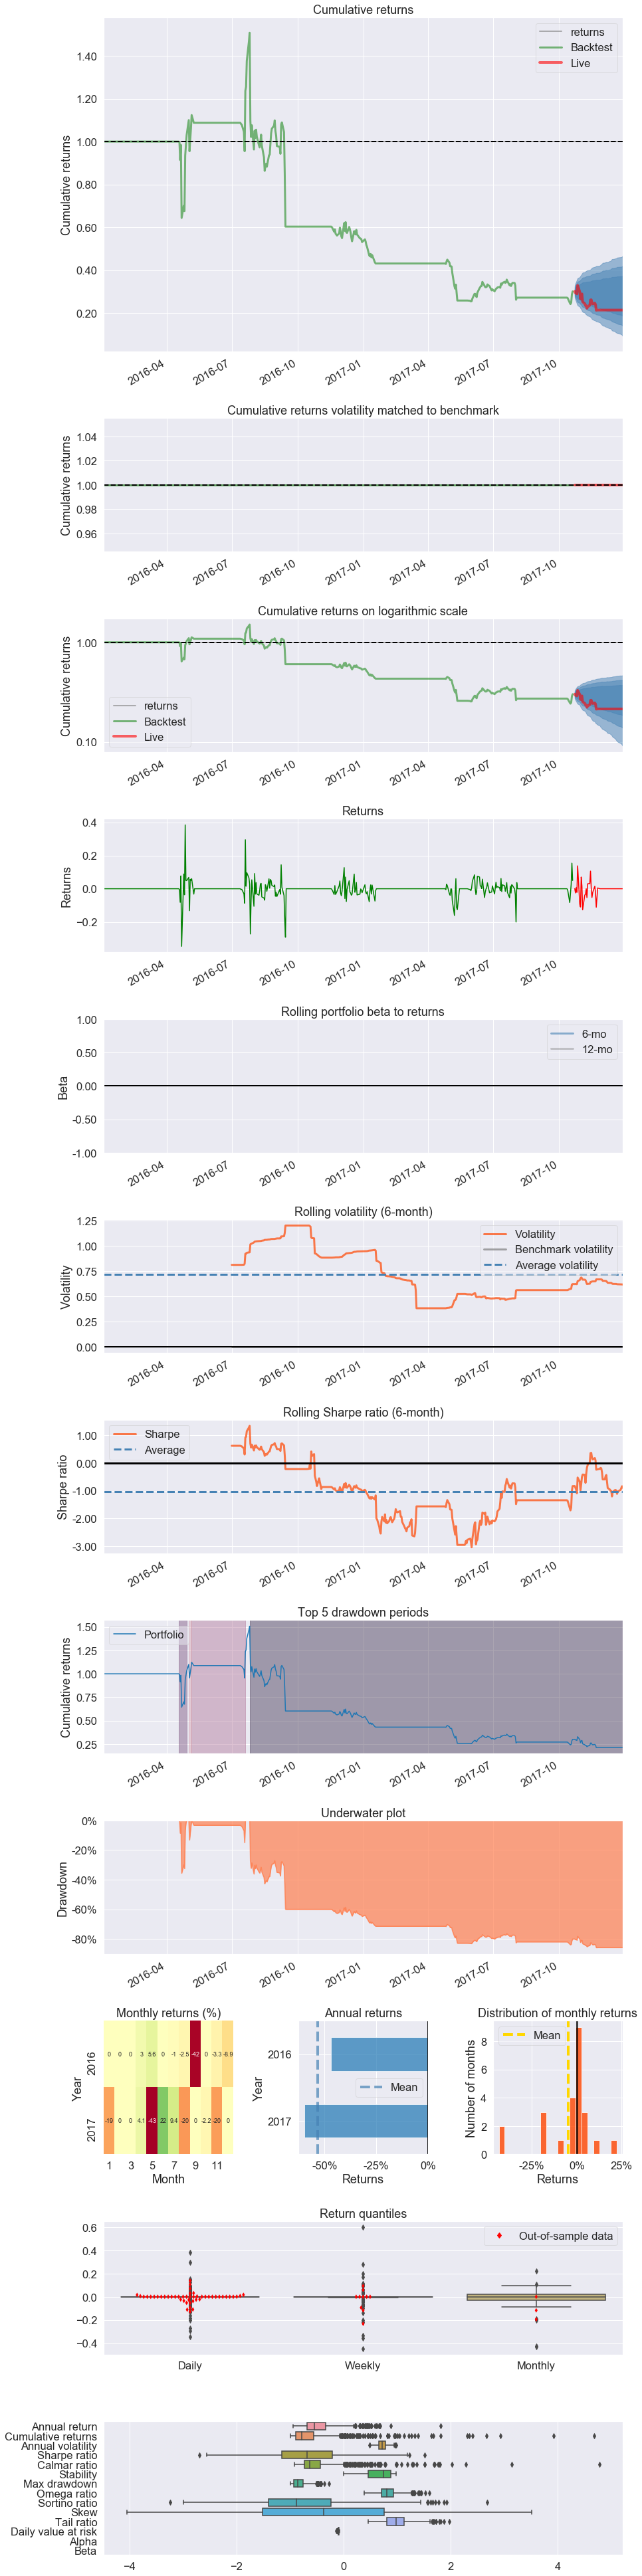

Stress Events,mean,min,max
New Normal,-0.19%,-34.61%,38.41%


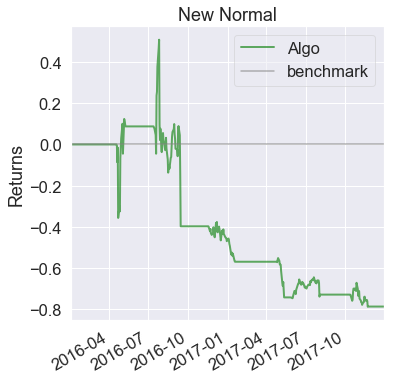

Top 10 long positions of all time,max
MSFT,735.74%


Top 10 short positions of all time,max
AAPL,-777.46%


Top 10 positions of all time,max
AAPL,777.46%
MSFT,735.74%


All positions ever held,max
AAPL,777.46%
MSFT,735.74%


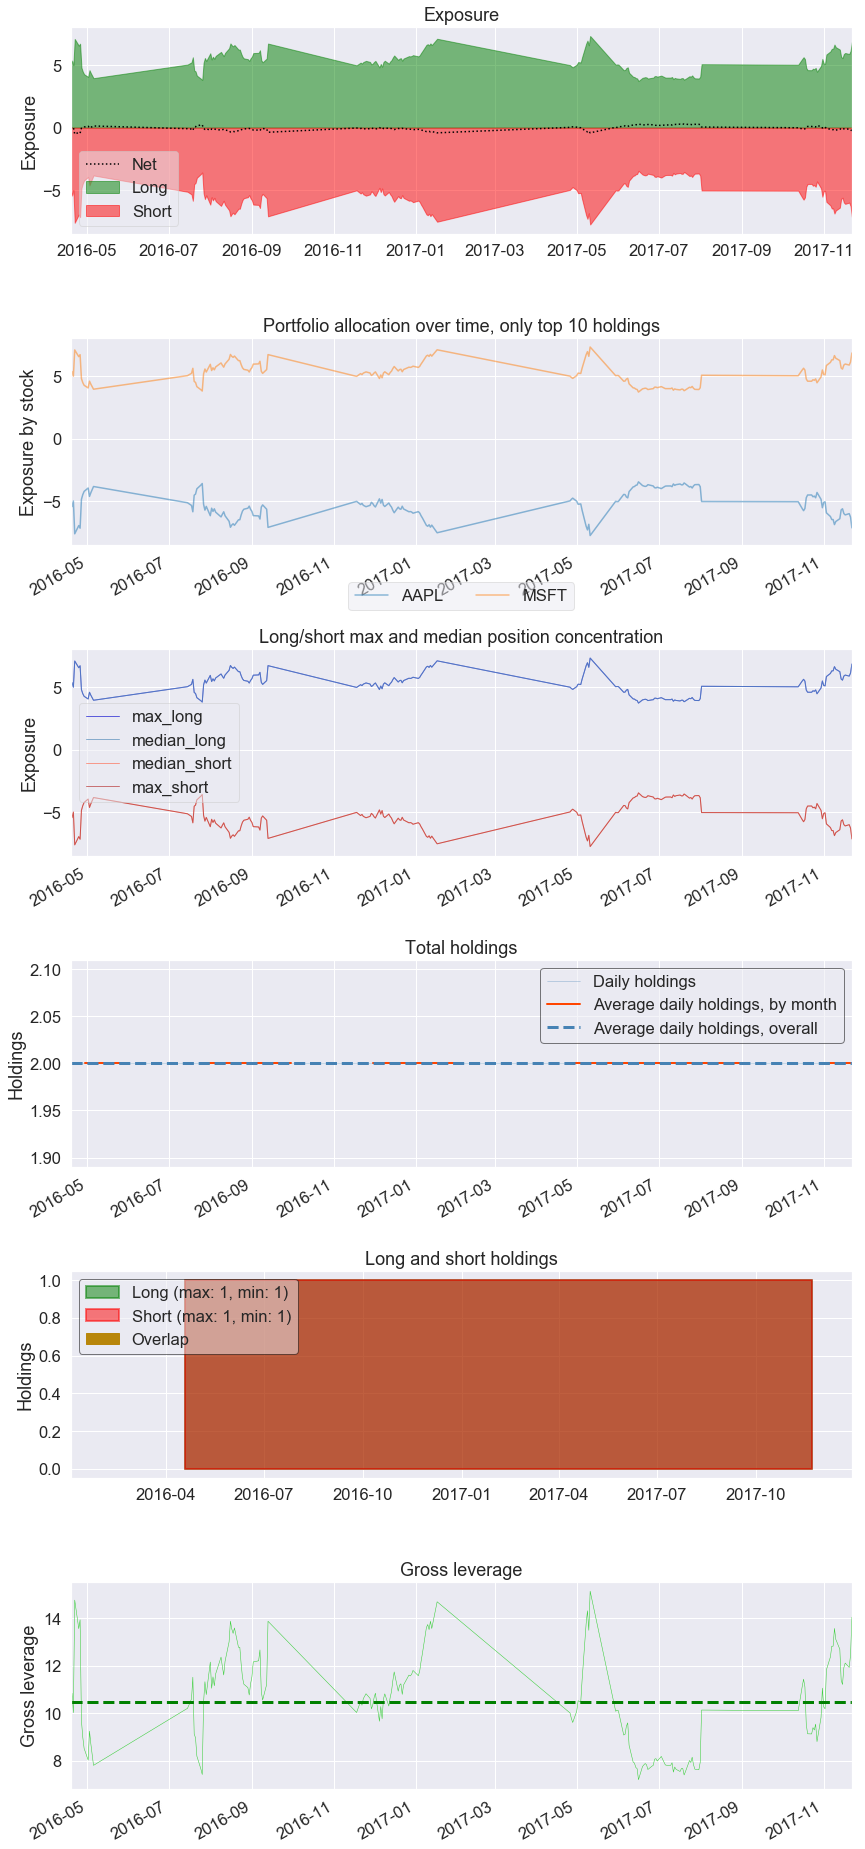

/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


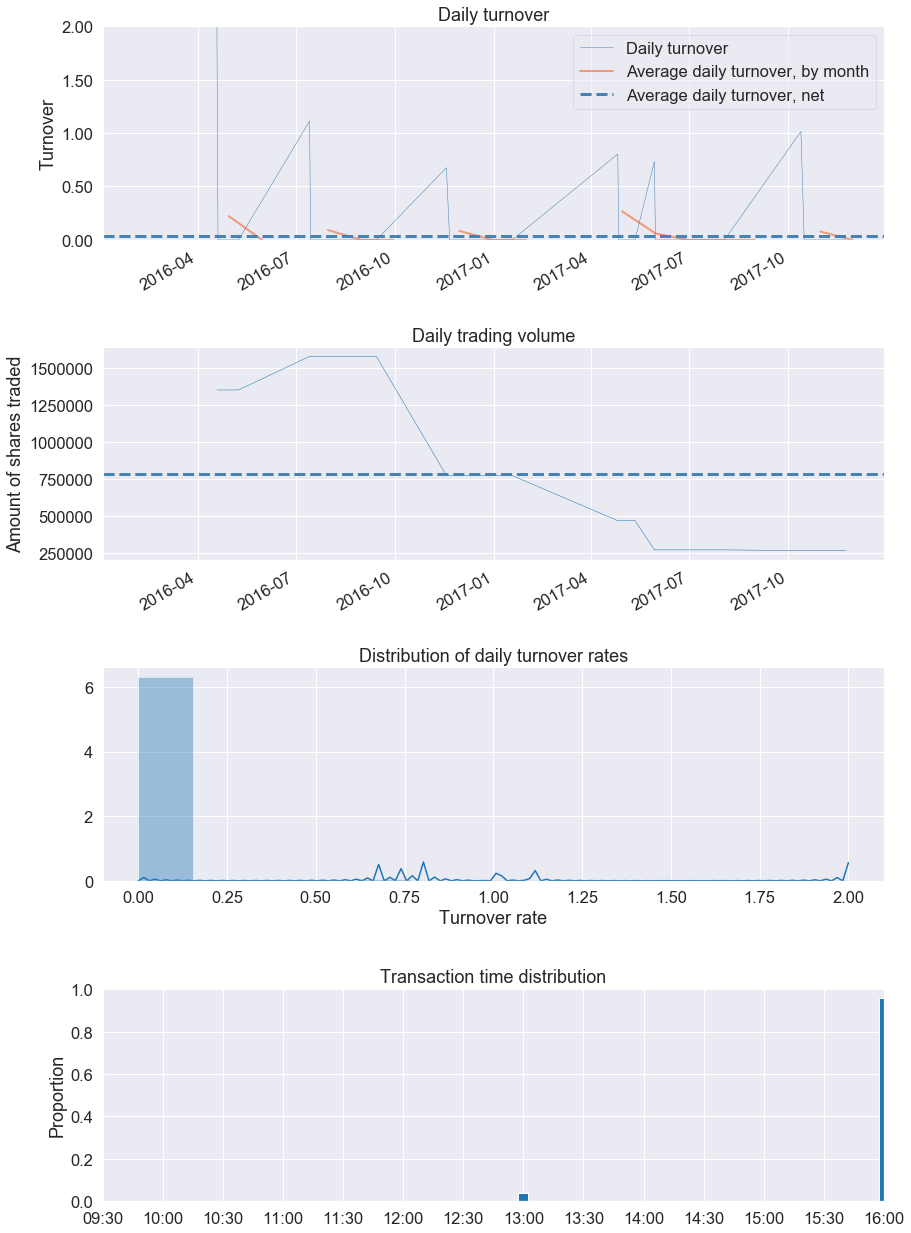

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,12.00,6.00,6.00
Percent profitable,0.50,0.17,0.83
Winning round_trips,6.00,1.00,5.00
Losing round_trips,6.00,5.00,1.00
Even round_trips,0.00,0.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$-7849285.96,$-7213905.69,$-635380.27
Gross profit,$11530839.32,$6522201.82,$5008637.50
Gross loss,$-19380125.28,$-13736107.51,$-5644017.77
Profit factor,$0.59,$0.47,$0.89
Avg. trade net profit,$-654107.16,$-1202317.62,$-105896.71
Avg. winning trade,$1921806.55,$6522201.82,$1001727.50
Avg. losing trade,$-3230020.88,$-2747221.50,$-5644017.77
Ratio Avg. Win:Avg. Loss,$0.59,$2.37,$0.18
Largest winning trade,$6522201.82,$6522201.82,$2504957.65
Largest losing trade,$-7345343.42,$-7345343.42,$-5644017.77


Duration stats,All trades,Short trades,Long trades
Avg duration,44 days 07:40:00,44 days 07:40:00,44 days 07:40:00
Median duration,51 days 11:00:00,51 days 11:00:00,51 days 11:00:00
Longest duration,65 days 00:00:00,65 days 00:00:00,65 days 00:00:00
Shortest duration,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,nan%,nan%,nan%
Avg returns winning,nan%,nan%,nan%
Avg returns losing,nan%,nan%,nan%
Median returns all round_trips,nan%,nan%,nan%
Median returns winning,nan%,nan%,nan%
Median returns losing,nan%,nan%,nan%
Largest winning trade,nan%,nan%,nan%
Largest losing trade,nan%,nan%,nan%


Symbol stats,AAPL,MSFT
Avg returns all round_trips,nan%,nan%
Avg returns winning,nan%,nan%
Avg returns losing,nan%,nan%
Median returns all round_trips,nan%,nan%
Median returns winning,nan%,nan%
Median returns losing,nan%,nan%
Largest winning trade,nan%,nan%
Largest losing trade,nan%,nan%


Profitability (PnL / PnL total) per name,
AAPL,91.91%
MSFT,8.09%


/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


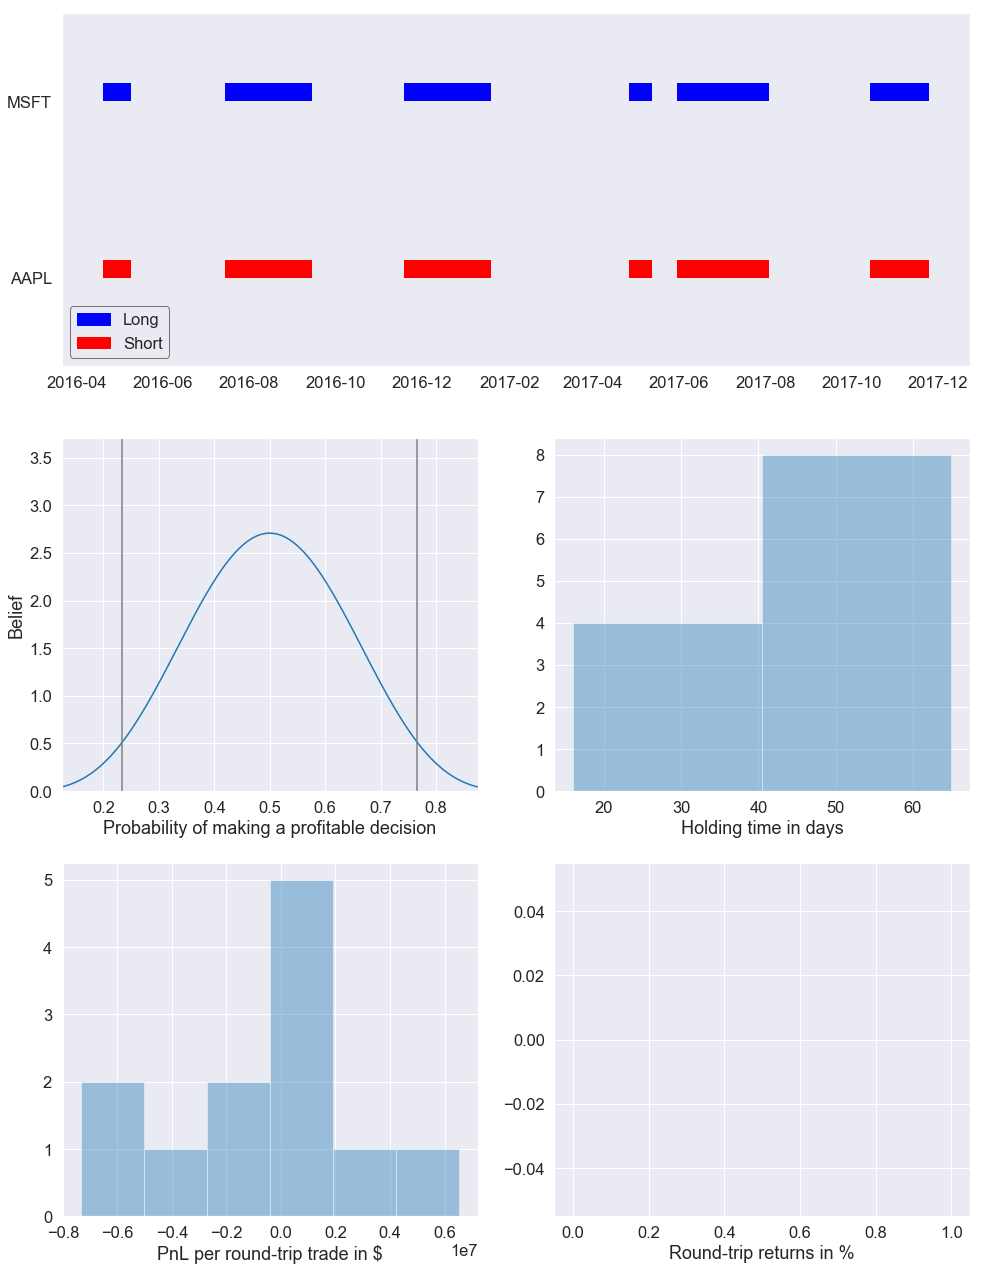

In [10]:
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    live_start_date='2017-10-22',
    round_trips=True,
    benchmark_rets=benchmark
)

In [35]:
trace = pf.bayesian.run_model(
    'best',
    returns[:-60],
    returns[-59:],
    samples=5000,
    progressbar=False
)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Convergence archived at 42000
Interrupted at 42,000 [21%]: Average Loss = -625.49


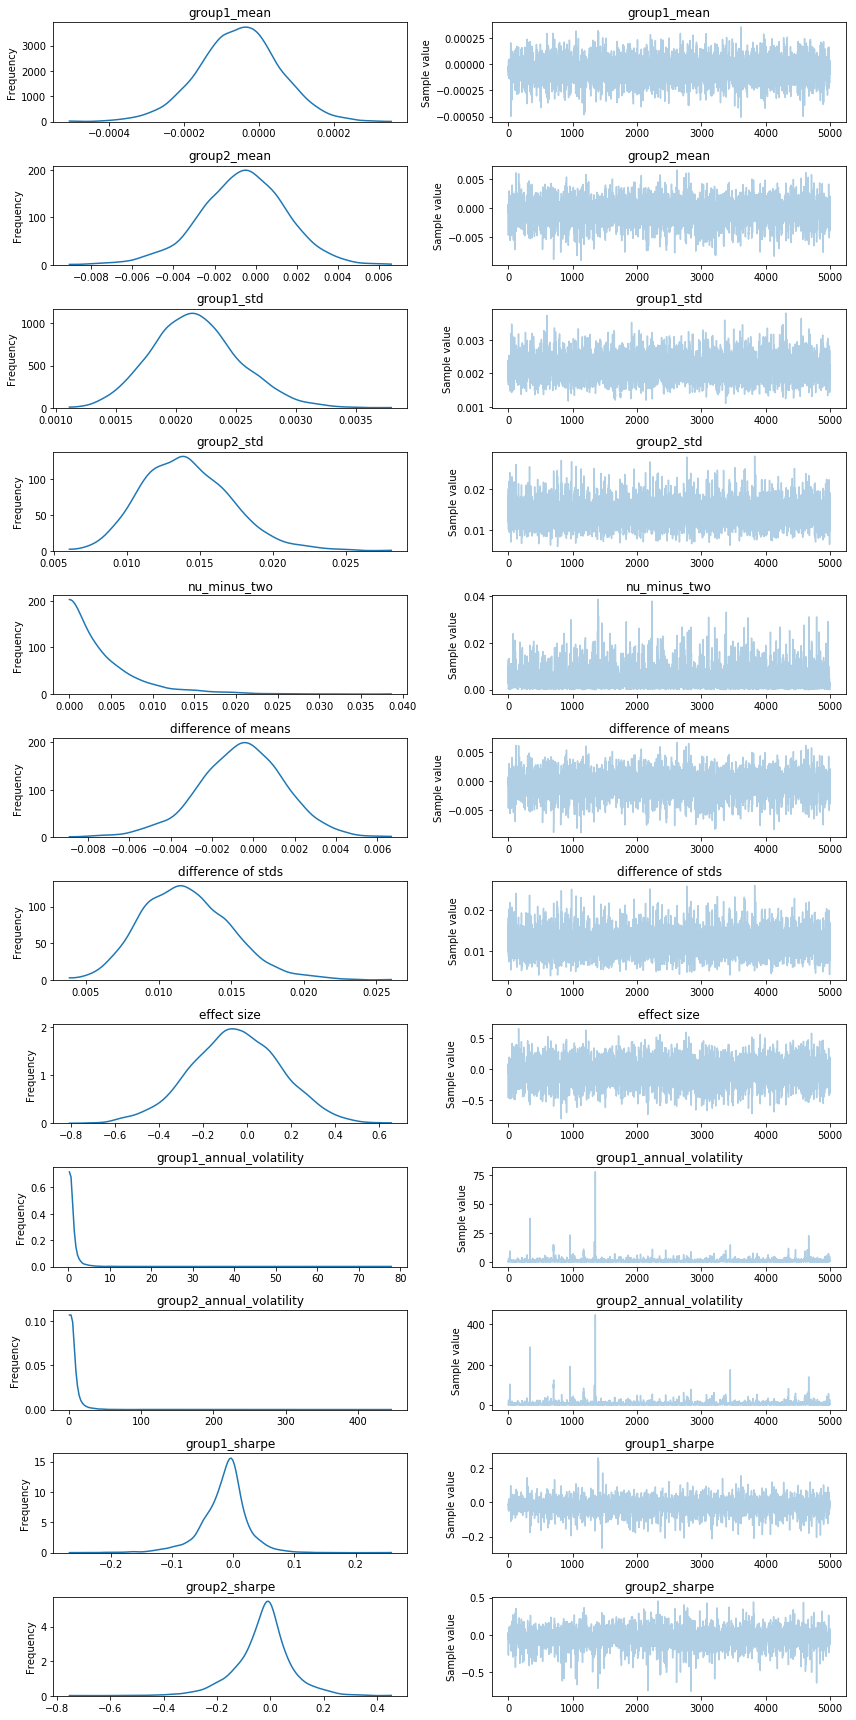

In [36]:
pm.traceplot(trace);

In [32]:
trace = pf.bayesian.run_model(
    't',
    returns,
    samples=5000,
    progressbar=False
)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Convergence archived at 42800
Interrupted at 42,800 [21%]: Average Loss = -512


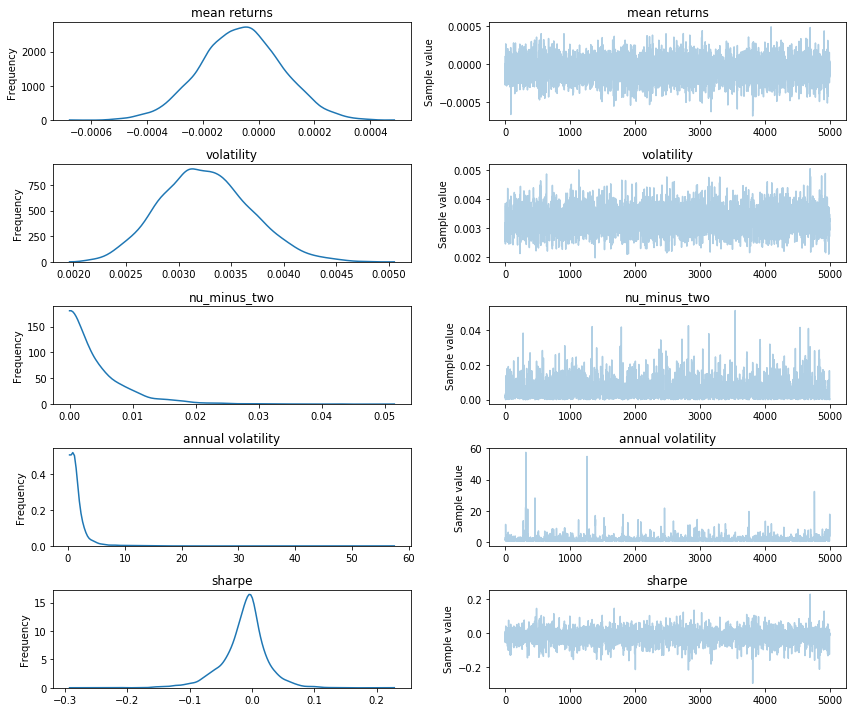

In [33]:

pm.traceplot(trace);

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...


Running T model


Convergence archived at 43100
Interrupted at 43,100 [21%]: Average Loss = -466.03



Finished T model (required 13.18 seconds).

Running BEST model


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Convergence archived at 42000
Interrupted at 42,000 [21%]: Average Loss = -624.93
/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
No handles with labels found to put in legend.



Finished BEST model (required 20.16 seconds).

Finished plotting Bayesian cone (required 0.06 seconds).

Finished plotting BEST results (required 0.41 seconds).

Finished computing Bayesian predictions (required 0.06 seconds).

Finished plotting Bayesian VaRs estimate (required 0.04 seconds).

Running alpha beta model


TypeError: unorderable types: int() <= str()

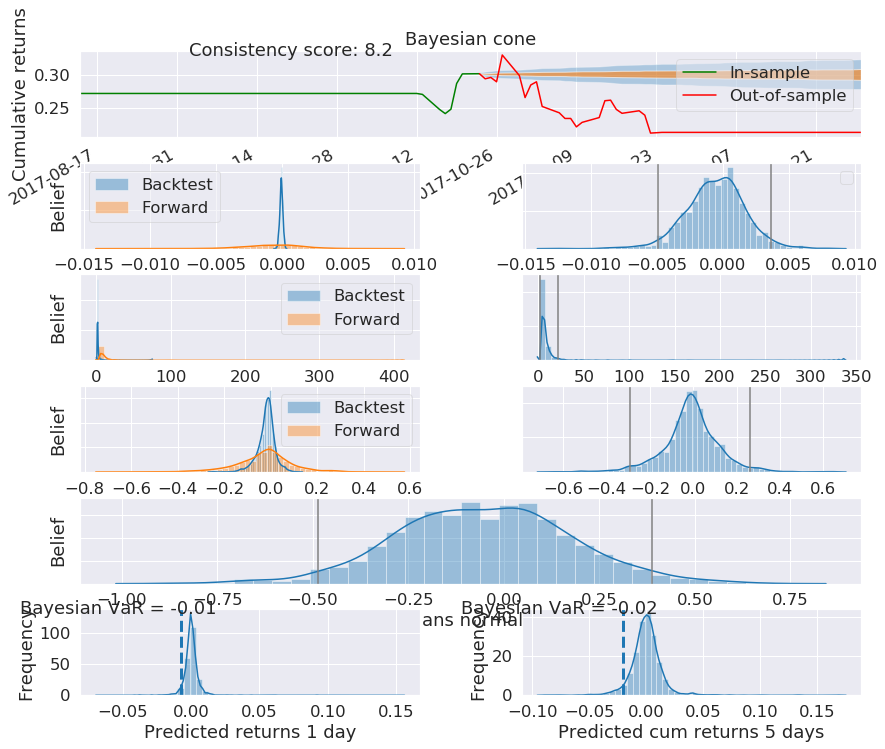

In [25]:
pf.create_bayesian_tear_sheet(
    returns,
    live_start_date='2017-10-22',
    benchmark_rets=benchmark,
    progressbar=False
)

In [18]:
pd.concat([returns, benchmark], axis=1)

,returns,returns
2016-01-04 00:00:00+00:00,0.000000,0.0
2016-01-05 00:00:00+00:00,0.000000,0.0
2016-01-06 00:00:00+00:00,0.000000,0.0
2016-01-07 00:00:00+00:00,0.000000,0.0
2016-01-08 00:00:00+00:00,0.000000,0.0
2016-01-11 00:00:00+00:00,0.000000,0.0
2016-01-12 00:00:00+00:00,0.000000,0.0
2016-01-13 00:00:00+00:00,0.000000,0.0
2016-01-14 00:00:00+00:00,0.000000,0.0
2016-01-15 00:00:00+00:00,0.000000,0.0


In [19]:
pd.__version__

'0.18.1'